In [1]:
import pandas as pd
from sklearn import decomposition, preprocessing
from functions import *

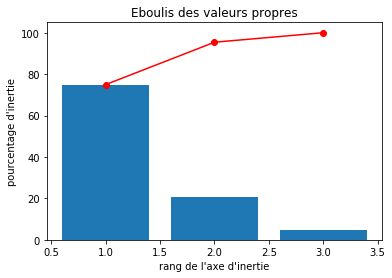

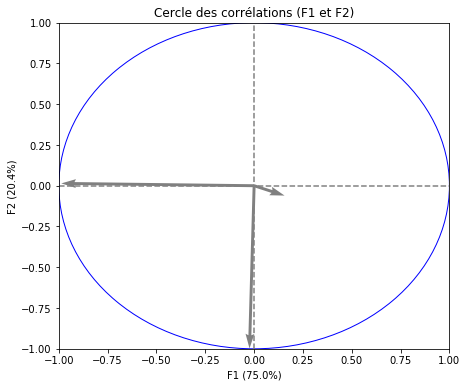

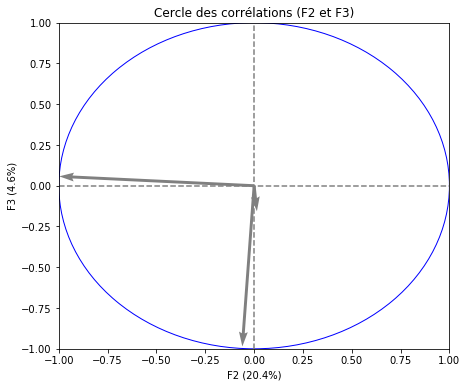

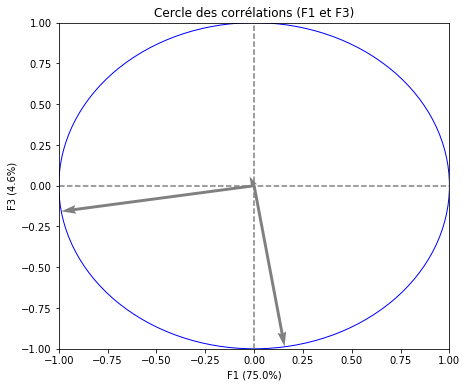

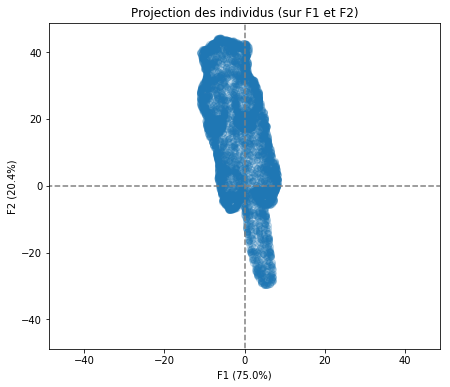

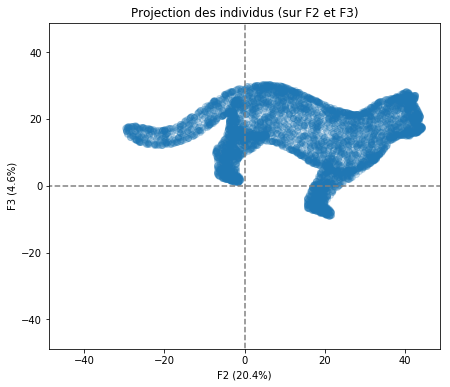

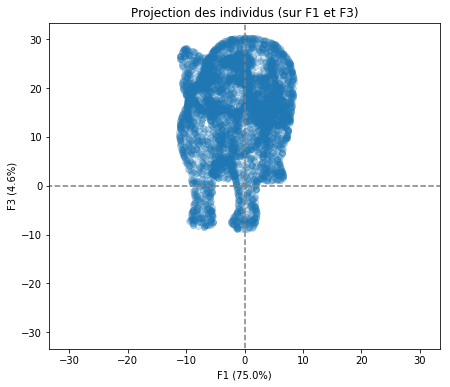

In [18]:
data = pd.read_csv("mystery.csv")

#Def nb de composantes
n_comp = 3

#Prep des données
X = data.values

#Pas besoin de réduire les données sont toutes de la m unité, par contre on centre : 
std_scale = preprocessing.StandardScaler(with_std = False).fit_transform(X) 

#Calcul des composantes principales : 
pca = decomposition.PCA(n_components = n_comp)
pca.fit(X) #Ici fit(X) et pas fit(X_scaled) parce qu'on a pas réduit 

#Eboulis des valeurs propres : 
display_scree_plot(pca)

#Cercle des corrélations : 
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1), (1,2), (0,2)])

#Projection des individus 
X_projected = pca.transform(X)
display_factorial_planes(X, n_comp, pca, [(0,1), (1,2), (0,2)], alpha = 0.2)

plt.show()

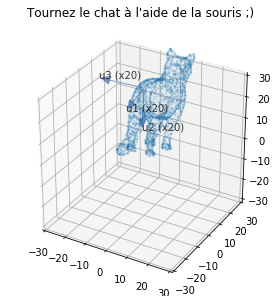

In [19]:
#################################
############ En 3D ##############
#################################

from mpl_toolkits.mplot3d import axes3d
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')
ax.set_xlim(-30,30)
ax.set_ylim(-30,30)
ax.set_zlim(-30,30)
fig.tight_layout()
x, y, z = X.T
ax.scatter(x, y, z, alpha = 0.1, s=1)
plt.title("Tournez le chat à l'aide de la souris ;)")

# Affichage des vecteurs propres (axes principaux d'inertie)
pcs = pca.components_
for i in range(3):
    eigen_vector_x20 = pcs[i] * 20
    eigen_vector = Arrow3D([0, eigen_vector_x20[0]], [0, eigen_vector_x20[1]],[30, 30+eigen_vector_x20[2]], mutation_scale=20, lw=1, arrowstyle="-|>", color="#4c72b0", alpha=.7)
    ax.add_artist(eigen_vector)
    ax.text3D(eigen_vector_x20[0],eigen_vector_x20[1],30+eigen_vector_x20[2],"u{} (x20)".format(i+1), color="#333333")

plt.show()